<a href="https://colab.research.google.com/github/arafianto/Explora-Bangkit-Capstone/blob/main/EfficientNetB0_Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Datasets Preparations

Upload the ```kaggle.json``` to be able to import the Kaggle datasets

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ahmadrafianto","key":"222aab783a7c99308020bc2010cdf96a"}'}

In [ ]:
! mkdir ~/.kaggle # Make a directory for the .json file
! cp kaggle.json ~/.kaggle/ # Copy the .json file to the .kaggle directory
! chmod 600 ~/.kaggle/kaggle.json # GIve user permission to read/write file

! mkdir dataset # Make a directory for the dataset

! kaggle datasets download -d yudhaislamisulistya/plants-type-datasets # Download the kaggle datasets

! unzip plants-type-datasets.zip -d dataset # Unzip the kaggle dataset zip to the 'dataset' directory

! rm 'plants-type-datasets.zip' # Delete the zip file

# Importing Library

In [4]:
import matplotlib.pyplot as plt
import os

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model

# Loading Datasets

Specify the path of each ```train```, ```test```, and ```validation``` datasets

In [5]:
path = '/content/dataset/split_ttv_dataset_type_of_plants/' # Specify the main directory for the splitting of labels
train_path = path + 'Train_Set_Folder'
test_path = path + 'Test_Set_Folder'
val_path = path + 'Validation_Set_Folder'

In [6]:
batch_size = 32
img_height = 150
img_width = 150

In [7]:
# Train Datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Test Datasets
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation Datasets
val_ds = tf.keras.utils.image_dataset_from_directory(
  val_path,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 23972 files belonging to 30 classes.
Found 2998 files belonging to 30 classes.
Found 3030 files belonging to 30 classes.
['aloevera', 'banana', 'bilimbi', 'cantaloupe', 'cassava', 'coconut', 'corn', 'cucumber', 'curcuma', 'eggplant', 'galangal', 'ginger', 'guava', 'kale', 'longbeans', 'mango', 'melon', 'orange', 'paddy', 'papaya', 'peper chili', 'pineapple', 'pomelo', 'shallot', 'soybeans', 'spinach', 'sweet potatoes', 'tobacco', 'waterapple', 'watermelon']


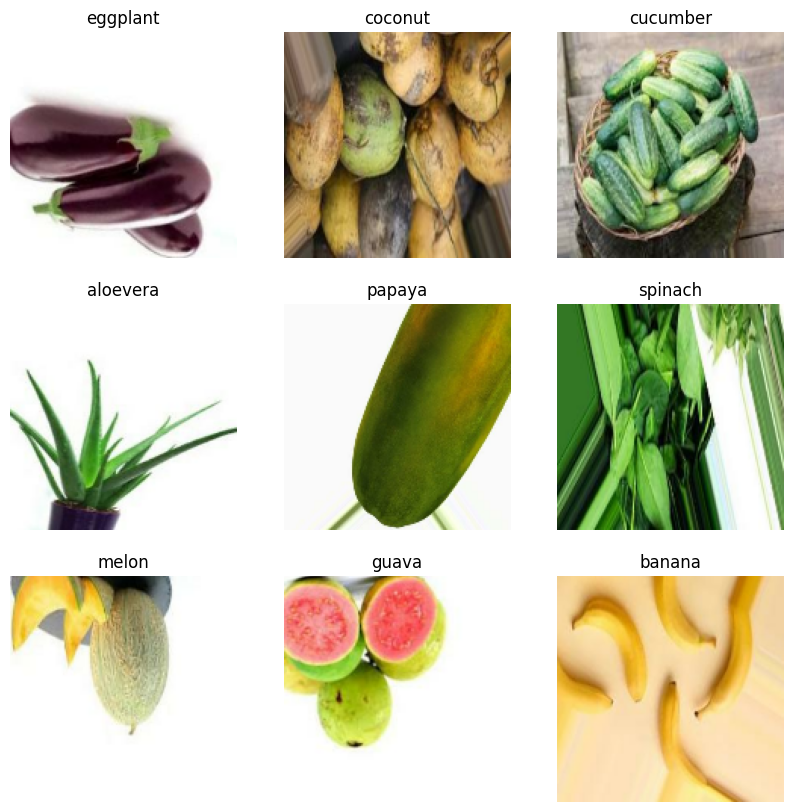

In [8]:
# Plot the sampled plant datasets

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [9]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 150, 150, 3)
(32,)


# EfficientNetB0 Model

EfficientNetB0 is part of the EfficientNet family, which was introduced to provide better performance with fewer parameters compared to traditional convolutional neural networks (CNNs).

In [11]:
model = EfficientNetB0(
    include_top=True,
    weights=None,
    classes=30,
    input_shape=(150, 150, 3),
    pooling = 'max')

In [12]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 150, 150, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 150, 150, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 stem_conv_pad (ZeroPadding  (None, 151, 151, 3)          0         ['normalization[0

In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [14]:
epochs = 20
hist = model.fit(train_ds,
                 epochs=epochs,
                 validation_data=val_ds)

Epoch 1/25
750/750 [==============================] - 169s 159ms/step - loss: 2.9138 - accuracy: 0.1876 - val_loss: 2.1519 - val_accuracy: 0.3531
Epoch 2/25
750/750 [==============================] - 113s 150ms/step - loss: 1.9399 - accuracy: 0.3950 - val_loss: 1.5873 - val_accuracy: 0.4908
Epoch 3/25
750/750 [==============================] - 119s 158ms/step - loss: 1.5593 - accuracy: 0.5045 - val_loss: 1.4963 - val_accuracy: 0.5317
Epoch 4/25
750/750 [==============================] - 115s 153ms/step - loss: 1.2950 - accuracy: 0.5843 - val_loss: 1.1831 - val_accuracy: 0.6191
Epoch 5/25
750/750 [==============================] - 113s 150ms/step - loss: 1.1178 - accuracy: 0.6389 - val_loss: 1.2466 - val_accuracy: 0.6182
Epoch 6/25
750/750 [==============================] - 114s 151ms/step - loss: 0.9486 - accuracy: 0.6898 - val_loss: 0.9460 - val_accuracy: 0.6977
Epoch 7/25
750/750 [==============================] - 113s 150ms/step - loss: 0.8173 - accuracy: 0.7309 - val_loss: 0.8405 -

# Model Evaluation

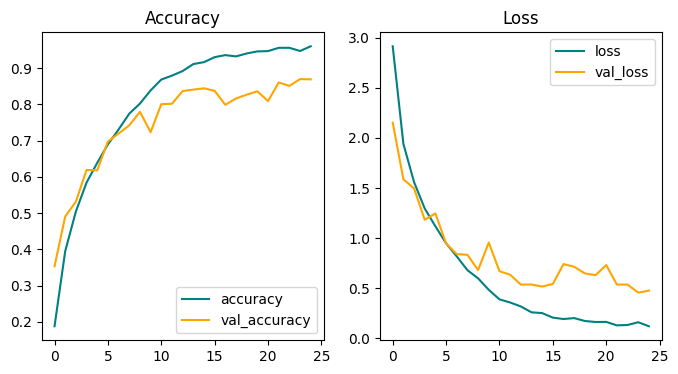

In [33]:
fig, ax = plt.subplots(1,2, figsize = (8, 4))

ax[0].plot(hist.history['accuracy'], color='teal', label='accuracy')
ax[0].plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
ax[0].set_title('Accuracy', fontsize=12)
ax[0].legend(loc="lower right")

ax[1].plot(hist.history['loss'], color='teal', label='loss')
ax[1].plot(hist.history['val_loss'], color='orange', label='val_loss')
ax[1].set_title('Loss', fontsize=12)
ax[1].legend(loc="upper right")

fig.show()


# Saving Model

In [ ]:
model.save(os.path.join('drive/MyDrive', 'EfficientNetB0_classifier.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
